In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Preparing dataset

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

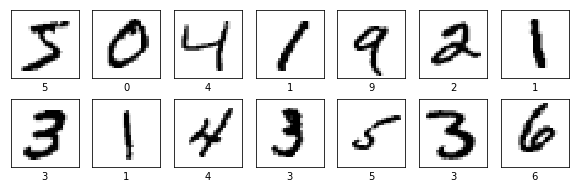

In [6]:
# Print some numbers

fig, ax_lst = plt.subplots(2, 7, figsize=(10,3), subplot_kw=dict(yticks=(), xticks=()))

for i, axe in enumerate(ax_lst.flat):
  axe.imshow(x_train[i], cmap='binary')
  axe.set_xlabel(y_train[i])

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.2357 - acc: 0.9297
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0962 - acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0691 - acc: 0.9782
Epoch 4/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0524 - acc: 0.9834
Epoch 5/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0416 - acc: 0.9861


In [9]:
model.evaluate(x_test, y_test,)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0874 - acc: 0.9756


[0.08742671386082657, 0.9756]

In [0]:
predictions = model.predict(x_test)

In [0]:
# plt.imshow(x_test[0], cmap='binary')

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

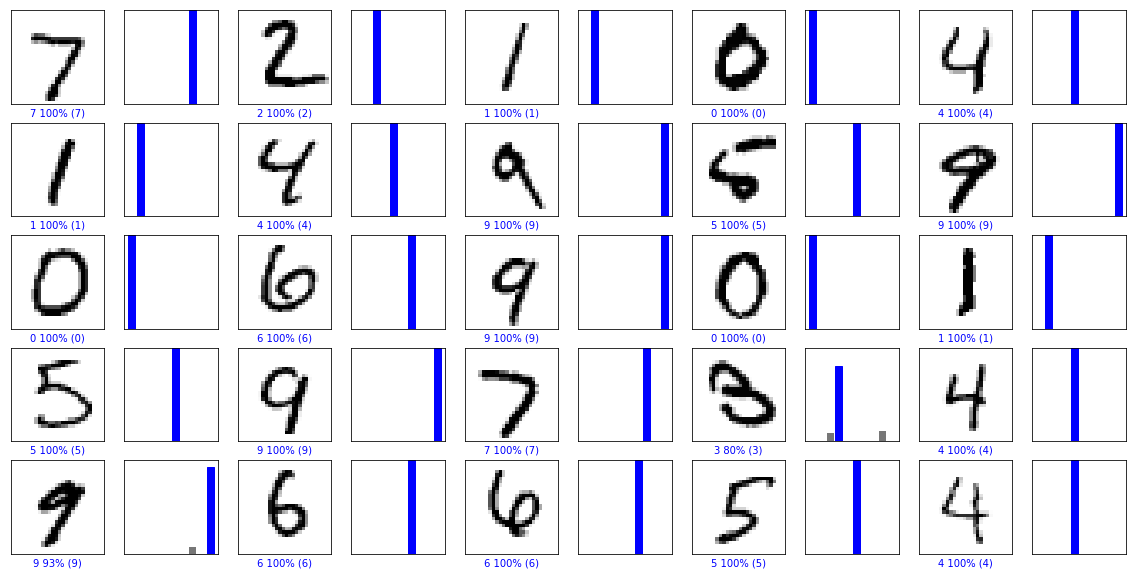

In [13]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

<br>

# Test on real data.

In [14]:
# Load self created digits dataset from local drive

from google.colab import files
uploaded = files.upload()

Saving DigitsDataset.npz to DigitsDataset.npz


In [0]:
data = np.load('DigitsDataset.npz')

x_real = data['x_train'] / 255.0
y_real = data['y_train']

data.close()

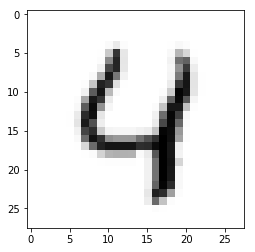

In [43]:
plt.imshow(x_real[0],cmap='binary')

In [18]:
model.evaluate(x_real, y_real)

5/5 [==============================] - 0s 412us/sample - loss: 3.3943 - acc: 0.4000


[3.3942711353302, 0.4]

In [49]:
np.argmax(model.predict(x_real[0:1]))

4